# EDA of netflix data for movie production
## 1. Intro to the Dataset and the Aim of the EDA
A movie/ show could have a wide very of features which may lead to its success in netflix. In this EDA we will find out what type of movie / show (features) would give more returns in revenue for netflix to produce or buy license. We will also study the effect of the same globally as well as country wise.

The dataset contains list of movies/shows which are popular in netflix. Since there is no particular value of revenue attached to each movie, we assume that if we can best match the features of movies in the list we can make the most revenue out of it.

### 1.1 Library Setup

In [59]:
# Scientific libraries
import numpy as np
import pandas as pd

# Visual libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # Visualize missing values

# Seed value for numpy.random
np.random.seed(42)

### 1.2 Read in the Data

In [60]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. Basic Exploration and Data Cleaning
### 2.1 Basic Exploration

In [61]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [62]:
netflix_df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [63]:
# Percentage of missing value for Movies
netflix_df[netflix_df['type'] == 'Movie'].isna().sum()/sum(netflix_df['type'] == 'Movie')*100

show_id         0.000000
type            0.000000
title           0.000000
director        3.066384
cast            7.747513
country         7.176643
date_added      0.000000
release_year    0.000000
rating          0.032621
duration        0.048932
listed_in       0.000000
description     0.000000
dtype: float64

In [64]:
# Percentage of missing value for TV shows
netflix_df[netflix_df['type'] == 'TV Show'].isna().sum()/sum(netflix_df['type'] == 'TV Show')*100

show_id          0.000000
type             0.000000
title            0.000000
director        91.405082
cast            13.079223
country         14.611360
date_added       0.373692
release_year     0.000000
rating           0.074738
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [65]:
# Splitting dataframe into two
movie_df = netflix_df[netflix_df['type'] == 'Movie']
tv_show_df = netflix_df[netflix_df['type'] == 'TV Show']

<Axes: >

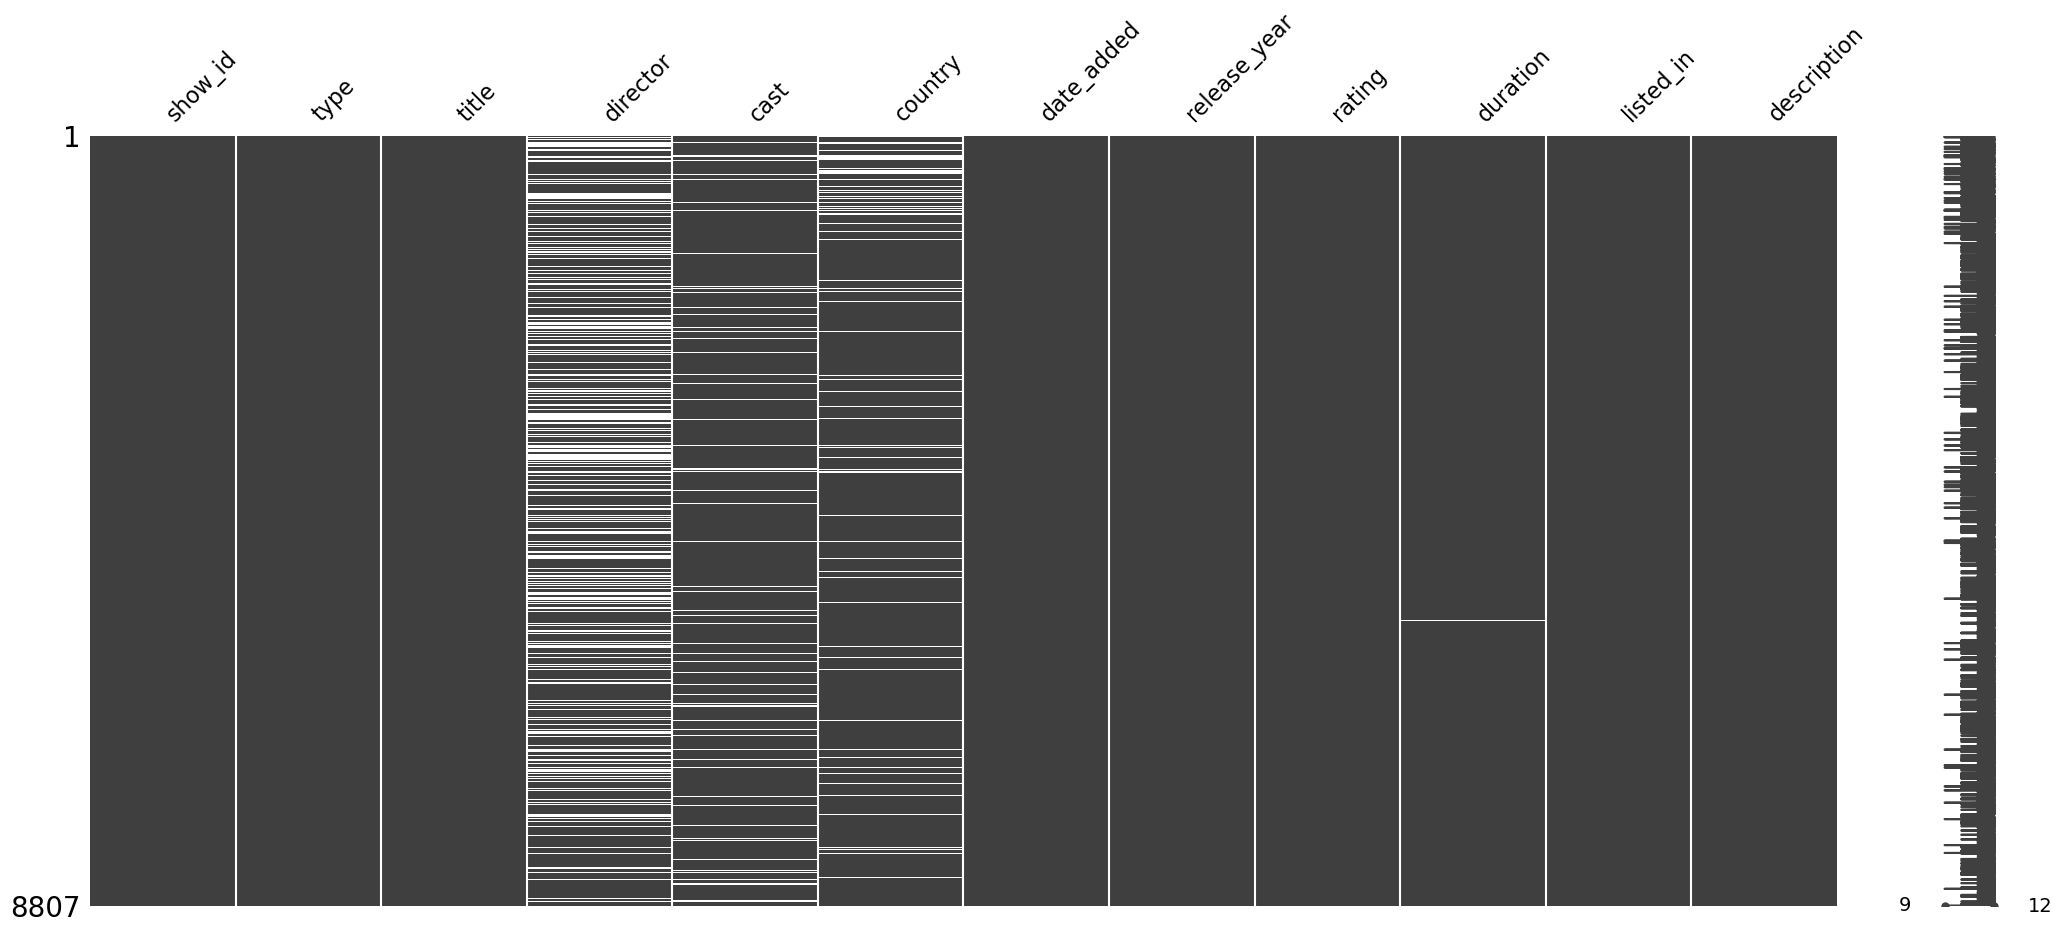

In [66]:
msno.matrix(netflix_df)

<Axes: >

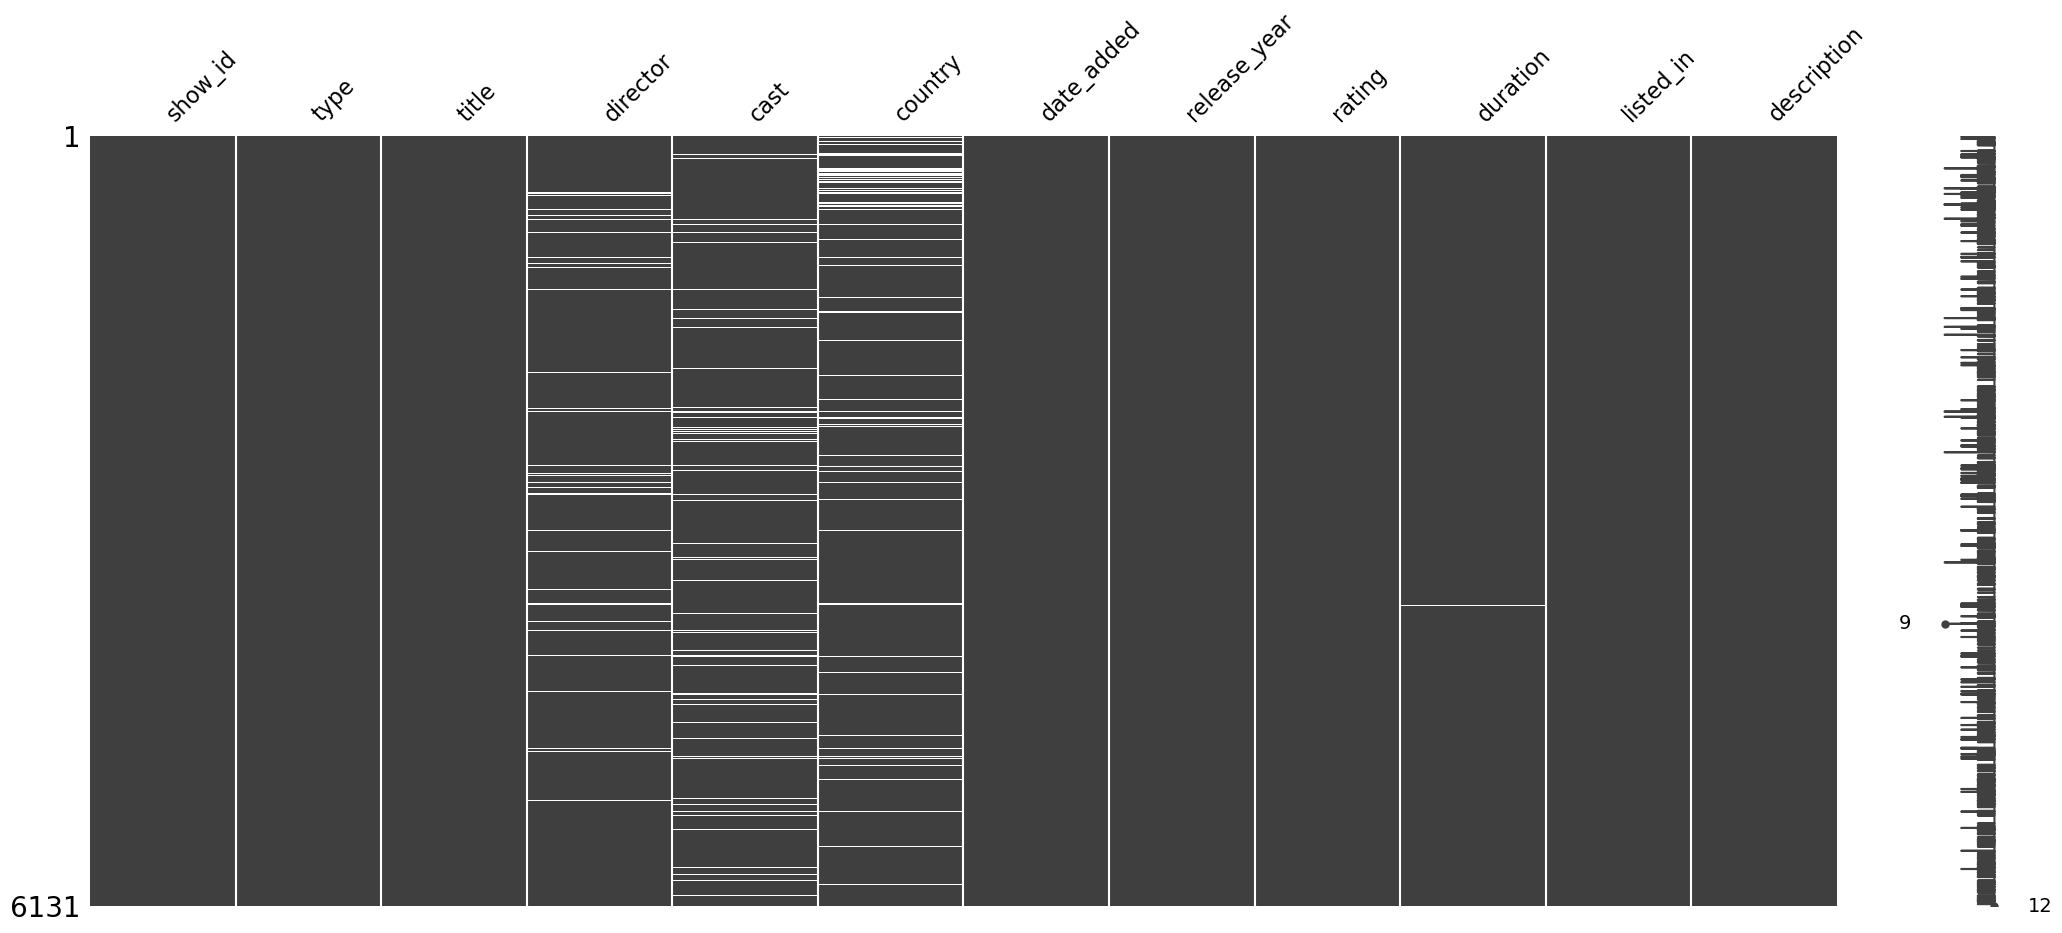

In [67]:
msno.matrix(movie_df)

<Axes: >

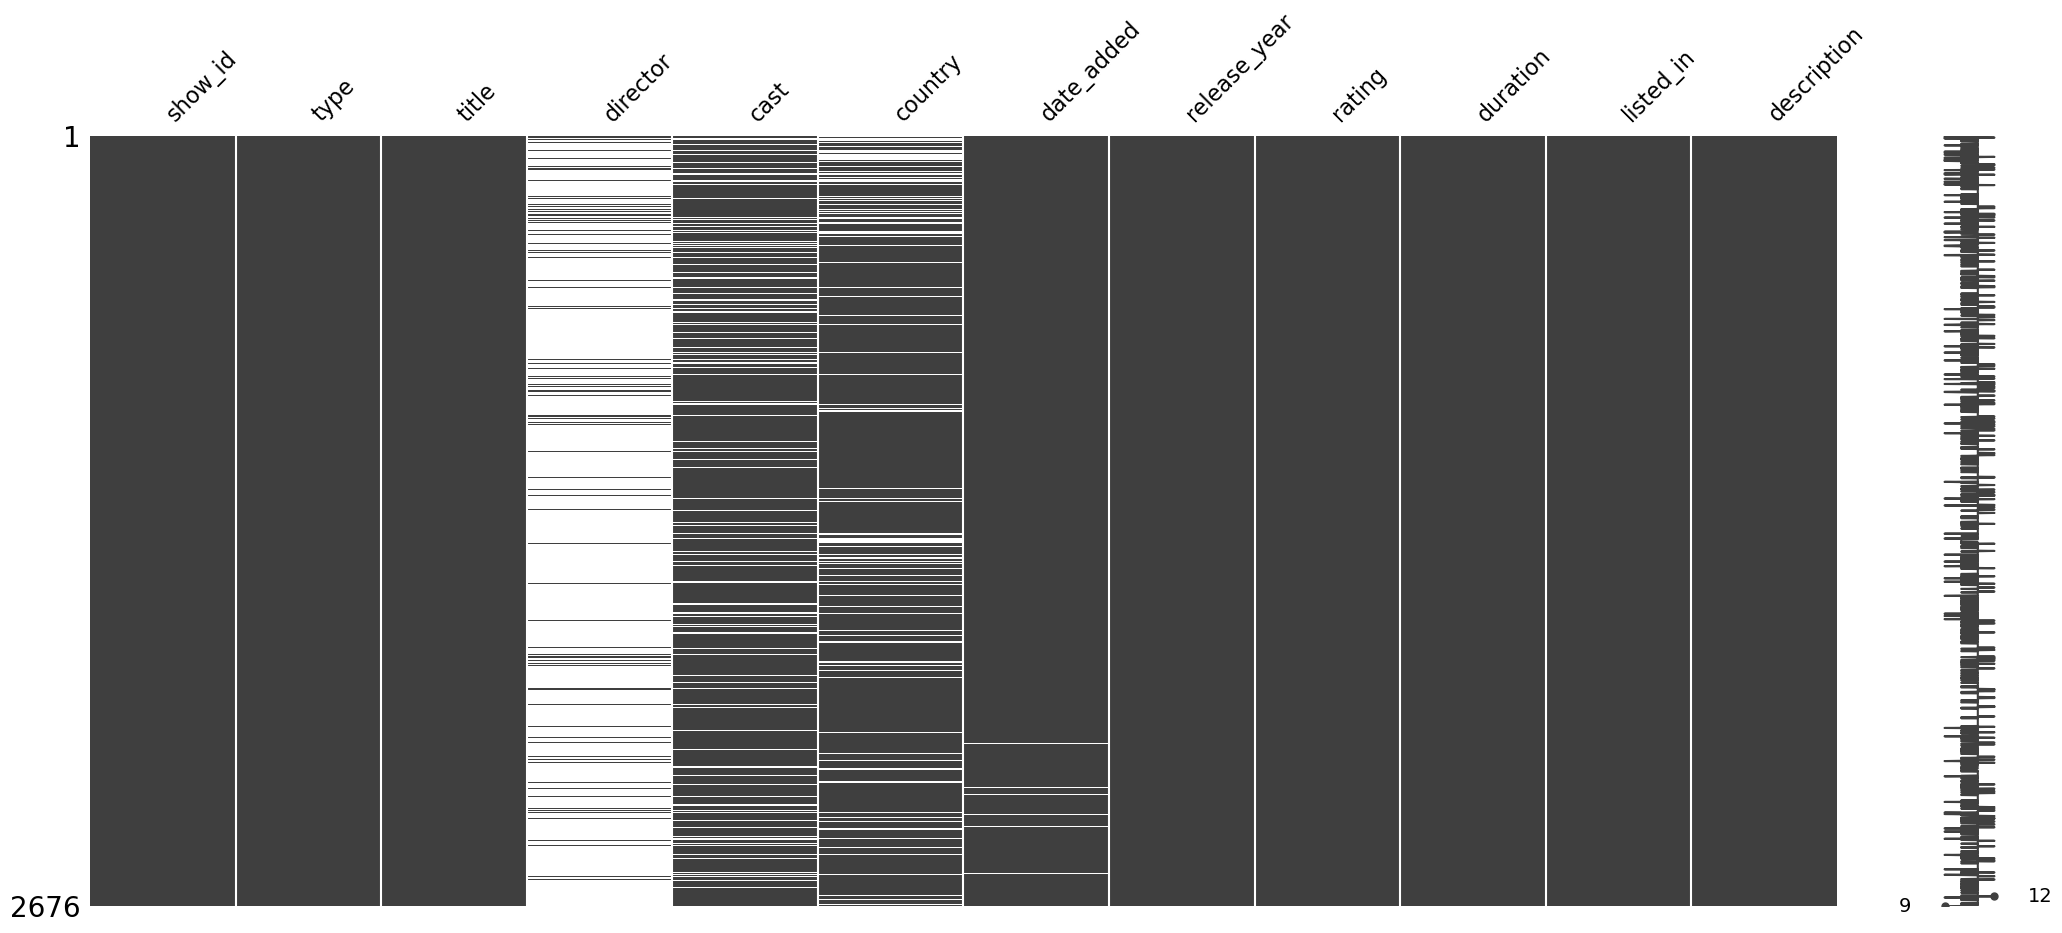

In [68]:
msno.matrix(tv_show_df)

#### **Understanding Features**

> `variable_name` : type - importance - comment

`show_id` : str - low - Unique ID for every Movie / Tv Show
  
`type` : category - high - Identifier - A Movie or TV Show
  
`title` : str - low - Title of the Movie / Tv Show
  
`director` : category - high - Director of the Movie

`cast` : category - high - Actors involved in the movie/show

`country` : category - medium - Country where the movie/show was produced

`date_added` : datetime - medium - Date it was added on Netflix.

`release_year` : int - medium - Actual Release year of the movie/show

`rating` : category - medium - TV Rating of the movie/show

`duration` : int - medium - Total Duration - in minutes or number of seasons. Converted to `duration_min`

`listed_in` : category - high - Genre

`description` : str - medium - The summary description

`delay_in_release` : category - high - How many years it took to release the movie / show in netflix (release_year is in year)

#### Issues List For the Dataset

- Uniformity ✅
  - `duration` field convert seasons to min to make it to same unit as movies and name it as `duration_min`
  - 3 `rating` values has durations => drop it
- Data type constrain ✅
  - all columns
- Data range constrains ✅
  - No future date in `date_added` and `released_date`
  - `delay_in_release` should be greater than or equal to 0
- Uniqueness constrain ✅
  - `title`, `listed_in`, `cast` should be unique for each row
- Categorical constrain ✅
  - All categorical variables check if names are consistent
  - `rating` specify the order (ordinal category) 
- Text constrain ✅
  - Explode data to remove csv ✅
    - `listed_in`
    - `cast`
    - `country`
    - `director`
- Cross field validation✅
  -  `date_added` >= `released_date`
- Completeness (dealing with missing data)✅
  -  `director` mode based based on country for movies
  -  `director` can't be imputed / removed for tv shows because 91.4 values are missing => mark it as 'Unknown' #TODO Use ML method to impute
  -  `cast` can't be imputed because of multiple cast in the same movie / tv show #TODO Use ML method to impute
  -  `country` take mode based on type (movie / tv show)
  -  `date_added`, `release_year`, `rating`, `duration_min` missing values to be removed because of less in numbers
-  Handling outliers - not applicable as there are less numeric values✅
-  Generating new features✅
   - `delay_in_release` In years (int) we can take the difference between `date_added` and `released_date`

### 2.2 Data Cleaning

In [69]:
# Explode data to remove csv values
netflix_df['cast'] = netflix_df['cast'].str.split(', ')
netflix_df['listed_in'] = netflix_df['listed_in'].str.split(', ')
netflix_df['country'] = netflix_df['country'].str.split(', ')
netflix_df['director'] = netflix_df['director'].str.split(', ')

In [70]:
netflix_df_exp = netflix_df.explode('cast').explode('listed_in').explode('country').explode('director')
netflix_df_exp

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [71]:
netflix_df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   director      151348 non-null  object
 4   cast          199845 non-null  object
 5   country       190094 non-null  object
 6   date_added    201833 non-null  object
 7   release_year  201991 non-null  int64 
 8   rating        201924 non-null  object
 9   duration      201988 non-null  object
 10  listed_in     201991 non-null  object
 11  description   201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [72]:
# Uniformity: `duration` field convert seasons to minutes to make it to same unit as movies
def duration_to_min(duration):
    if duration is np.nan: return duration
    if 'Season' in duration:
        return int(duration.split()[0]) * 30 # assuming usual series length as 30 minutes
    else:
        return int(duration.split()[0])

netflix_df_exp['duration_min'] = netflix_df_exp['duration'].map(duration_to_min)
netflix_df_exp.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",60.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",60.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",60.0
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",60.0


In [73]:
# uniformity:  3 `rating` values has durations => drop it
netflix_df_exp['rating']= netflix_df_exp['rating'].astype('str')
netflix_df_exp = netflix_df_exp[~ netflix_df_exp['rating'].str.contains('min')]


In [74]:
# Data type change for all columns
netflix_df_exp = netflix_df_exp.drop(['duration'], axis=1)
datatype_map = {
    'show_id' : 'str',
    'type' : 'category',
    'title' : 'str',
    'director' : 'category',
    'cast' : 'category',
    'country' : 'category',
    'rating' : 'category',
    'duration_min' : 'int',
    'date_added' : 'datetime64',
    'listed_in' : 'category',
    'description' : 'str'
}

# apply mapped category
netflix_df_exp_type = netflix_df_exp.astype(datatype_map,errors='ignore')
nf_df = netflix_df_exp_type
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201988 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201988 non-null  object        
 1   type          201988 non-null  category      
 2   title         201988 non-null  object        
 3   director      151345 non-null  category      
 4   cast          199842 non-null  category      
 5   country       190091 non-null  category      
 6   date_added    201830 non-null  datetime64[ns]
 7   release_year  201988 non-null  int64         
 8   rating        201988 non-null  category      
 9   listed_in     201988 non-null  category      
 10  description   201988 non-null  object        
 11  duration_min  201988 non-null  int64         
dtypes: category(6), datetime64[ns](1), int64(2), object(3)
memory usage: 14.4+ MB


In [75]:
# Drop duplicates
nf_df.drop_duplicates(inplace = True)

In [76]:
# Categorical constrain  All categorical variables check if names are consistent
nf_df['director'].value_counts()
nf_df['cast'].value_counts()
nf_df['listed_in'].value_counts()
nf_df['country'].value_counts()
nf_df['rating'].value_counts()
# no inconsistencies found in categorical variables

TV-MA       73819
TV-14       43925
R           25859
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
nan            67
Name: rating, dtype: int64

In [77]:
# Cross field validation : `date_added` >= `released_date`
nf_df = nf_df[nf_df['date_added'].dt.year >= nf_df['release_year']]

In [78]:
# - Completeness (dealing with missing data)
#   -  `director` can't be imputed / removed because large number of values are missing => mark it as 'Unknown' #TODO Use ML method to impute
nf_df['director'] = nf_df['director'].cat.add_categories('Unknown')

# #   -  `cast` can't be imputed because of multiple cast in the same movie / tv show #TODO Use ML method to impute
nf_df['cast'] = nf_df['cast'].cat.add_categories('Unknown')
nf_df = nf_df.fillna({'director':'Unknown', 'cast':'Unknown'})

/tmp/ipykernel_21083/2929168075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_df['director'] = nf_df['director'].cat.add_categories('Unknown')
/tmp/ipykernel_21083/2929168075.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_df['cast'] = nf_df['cast'].cat.add_categories('Unknown')


In [79]:
# - Completeness (dealing with missing data)
#   -  `country` take mode based on type (movie / tv show)
country_map = nf_df.groupby('type')['country'].agg(lambda x: x.value_counts().index[0]).to_dict()

nf_df['country']= nf_df['country'].fillna(nf_df['type'].map(country_map))


In [80]:
# - Completeness (dealing with missing data)
#   -  `date_added`, `release_year`, `rating`, `duration_min` missing values to be removed because of less in numbers
nf_df.dropna(subset = ['date_added', 'release_year', 'rating', 'duration_min'], inplace = True)


In [81]:
# Generating new features : `delay_in_release` In years (int) we can take the difference between `date_added` and `released_date`
nf_df['delay_in_release'] = nf_df['date_added'].dt.year - nf_df['release_year']


#### Asserts and Validations
All asserts and validations are present here so that DF can be validated at any time later

In [82]:
# Assert statement to check data types are above for netflix_df1 data frame
# Data type assertions
assert nf_df['show_id'].dtype == 'object'
assert nf_df['type'].dtype == 'category'
assert nf_df['title'].dtype == 'object'
assert nf_df['director'].dtype == 'category'
assert nf_df['cast'].dtype == 'category'
assert nf_df['country'].dtype == 'category'
assert nf_df['rating'].dtype == 'category'
assert nf_df['duration_min'].dtype == 'int'
assert nf_df['date_added'].dtype == 'datetime64[ns]'
assert nf_df['listed_in'].dtype == 'category'
assert nf_df['description'].dtype == 'object'
assert nf_df['delay_in_release'].dtype == 'int'


# Data range constrains assertion: No future date in `date_added` and `released_date`
assert nf_df['date_added'].max() < pd.Timestamp.now()
assert nf_df['delay_in_release'].min() <= 0

# Text constrains assertion
# check if each category column any entry contains a comma
assert ~all(nf_df['type'].str.contains(','))
assert ~all(nf_df['director'].str.contains(','))
assert ~all(nf_df['cast'].str.contains(','))
assert ~all(nf_df['country'].str.contains(','))
assert ~all(nf_df['listed_in'].str.contains(','))

# Uniqueness assertion
assert nf_df.duplicated().sum() == 0

# Cross field assertion : `date_added` >= `released_date`
assert all(nf_df['date_added'].dt.year >= nf_df['release_year'])

# Completeness assertion (Removing / imputing missing data)
assert all(nf_df.isna().sum() == 0)

## 3. Univariate Exploration / Understanding variables

### 3.1 Categorical Variables

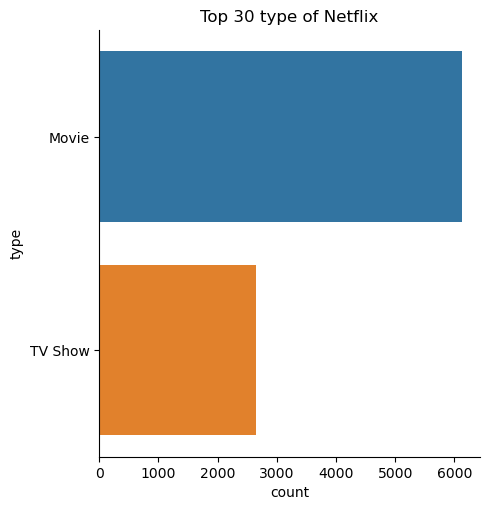

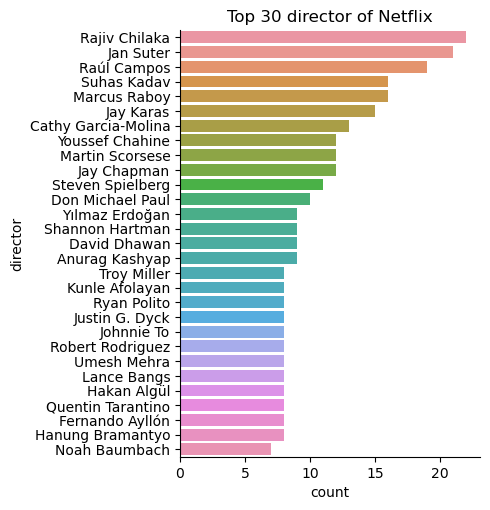

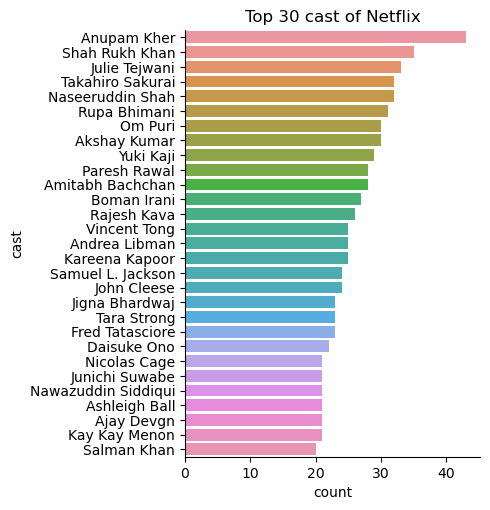

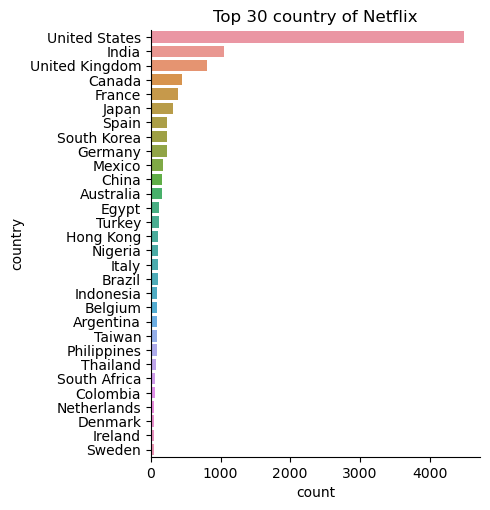

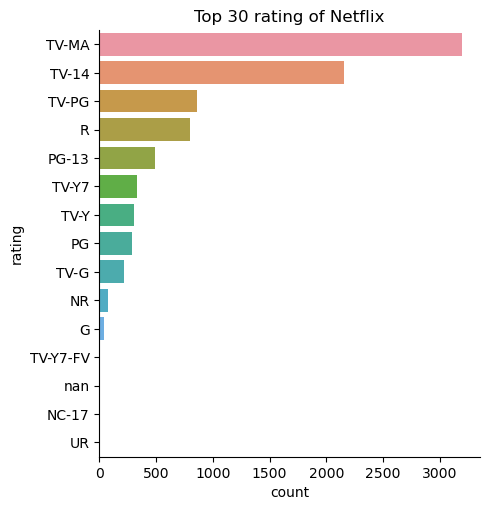

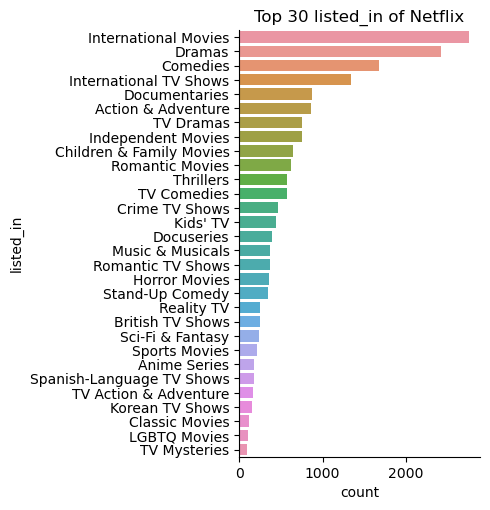

In [89]:
def plot_top_cat(nf_df,name):
    nf_df_name = nf_df[['show_id',name]].drop_duplicates()

    # Count occurrences of each director and select the top 30
    nf_df_name_count = nf_df_name[name].value_counts().head(30).drop('Unknown',errors='ignore')

    # Filter the DataFrame to include only the top 30 countries
    nf_df_name = nf_df_name[nf_df_name[name].isin(nf_df_name_count.index)]

    # Count plot of director
    sns.catplot(data = nf_df_name, 
                y = name,
                order = nf_df_name_count.index,
                kind = 'count')
    plt.title(f'Top {name} of Netflix')
    plt.show()
    
    
# Plot top 30 for all categorical variables
for col in nf_df.select_dtypes(include='category').columns:
    plot_top_cat(nf_df,col)

### 3.1 Numerical Variables

KeyError: ('show_id', 'duration_min')

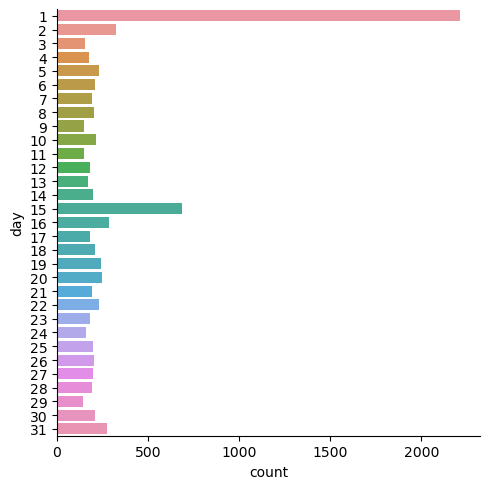

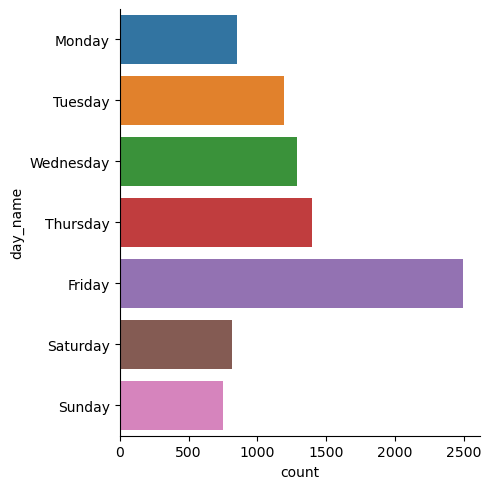

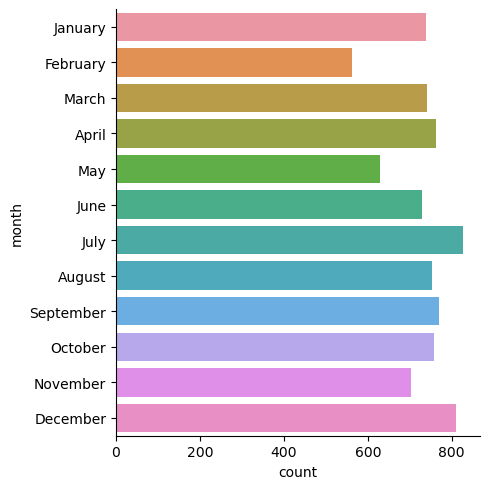

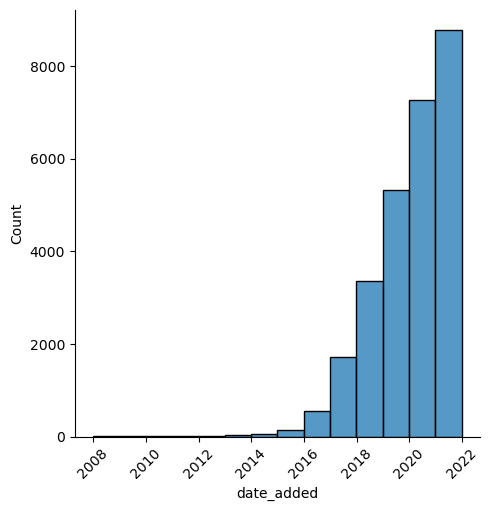

In [138]:
# Most released dates
# Date added for every show_Id
nf_df_date_added = nf_df[['show_id', 'date_added']].drop_duplicates()
nf_df_date_added['day'] = nf_df_date_added['date_added'].dt.day
nf_df_date_added['day_name'] = nf_df_date_added['date_added'].dt.day_name()
nf_df_date_added['month'] = nf_df_date_added['date_added'].dt.month_name()

sns.catplot(data = nf_df_date_added, 
            kind = 'count',
            y = 'day',
            order = [i for i in range(1,32)] )


sns.catplot(data = nf_df_date_added, 
            kind = 'count', 
            y = 'day_name',
            order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.catplot(data = nf_df_date_added, 
            kind = 'count', 
            y = 'month',
            order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

sns.displot(data=nf_df_date_added, 
            cumulative=True, 
            x ='date_added',
            kind ='hist',
            binwidth = 365
            )
plt.xticks(rotation=45)

sns.displot(data=nf_df['show_id','duration_min'].drop_duplicates(),
            x = 'duration_min',
            kind = 'hist',
            binwidth = 5
            )

# Delay in release
plot_top_cat(nf_df,'delay_in_release')


## 4. Bivariate Exploration

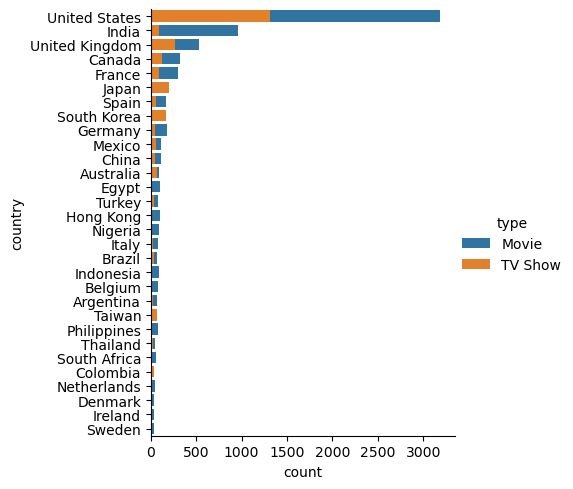

In [ ]:
# Filter DataFrame to include only unique combinations of 'show_id', 'type', and 'country'
nf_df_loc = nf_df[['show_id', 'type', 'country']].drop_duplicates()

# Count occurrences of each country and select the top 30
nf_df_loc_count = nf_df_loc['country'].value_counts().head(30) # default sorted by descending order count

# Filter the DataFrame to include only the top 30 countries
nf_df_loc = nf_df_loc[nf_df_loc['country'].isin(nf_df_loc_count.index)]

# Plot the counts using Seaborn's catplot
sns.catplot(data = nf_df_loc, 
            y = 'country', 
            kind = 'count', 
            hue = 'type',
            order = nf_df_loc_count.index,
            dodge=False)

# Show the plot
plt.show()